<a href="https://colab.research.google.com/github/The-KS101/MNIST_digit_recognizing/blob/master/Digit_Recognizer_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import backend as K

Using TensorFlow backend.


######Get the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

####Check the type and size of data in the dataset and plot the data.

In [3]:
type(x_train[0]), x_train.shape, y_train.shape

(numpy.ndarray, (60000, 28, 28), (60000,))

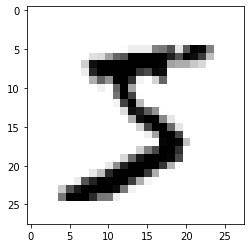

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)

######Now we normalize our pixel values from 0-255 to 0 or 1, making it  easier for the netwirk to perform computations

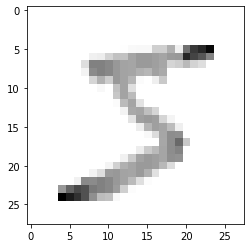

In [5]:
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

##Building the model
We use a feed forward Neural Network
Our First layer always expects an input dimension corresponding to the data
size being inputed. Hidden layers infer their inpu dimensions and do not need to be initialized. 
First flatten the input shape of 28 * 28 into a shape of 784, then add the layer to the model. Then continue to add layers to the model and at the end, the output dimension will be equal to the required predictions(0-9)

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Dense(18, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 18)                1170      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                190       
Total params: 51,600
Trainable params: 51,600
Non-trainable params: 0
_________________________________________________________________


# Compiling and fitting the model
Compiling the model is basically the manner in which your neural network learns, giving you control of how the neural network learns. After compiling the model, it is fit to the training data and their labels a selected number of times(EPOCHS) and other features like batch size or a validation split or shuffle.

In [7]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=2)

Epoch 1/5
60000/60000 [==============================] - 38s 635us/step - loss: 0.3409 - accuracy: 0.9126
Epoch 2/5
60000/60000 [==============================] - 38s 634us/step - loss: 0.2733 - accuracy: 0.9478
Epoch 3/5
60000/60000 [==============================] - 41s 681us/step - loss: 0.2822 - accuracy: 0.9528
Epoch 4/5
60000/60000 [==============================] - 39s 653us/step - loss: 0.2934 - accuracy: 0.9567
Epoch 5/5
60000/60000 [==============================] - 39s 647us/step - loss: 0.2985 - accuracy: 0.9585


###Evaluating the model
We evalaute the model on a test set to ensure that there is no overfitting to the data.

10000/10000 [==============================] - 0s 25us/step
[0.32753069766837134, 0.9574999809265137]


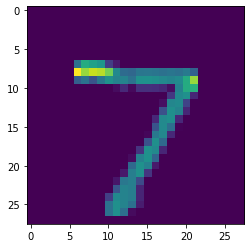

In [9]:
print(model.evaluate(x_test, y_test))
predictions = model.predict([x_test])
plt.imshow(x_test[0])
model.save('keras_mnist.model')

In [10]:
# Improving the output
model1 = Sequential()
model1.add(Flatten(input_shape = (28, 28)))
model1.add(Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model1.add(Dense(28, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
model1.add(Dense(10, activation='softmax'))
print(model1.summary())
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=5, batch_size=100)
model1.evaluate(x_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_5 (Dense)              (None, 28)                28700     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                290       
Total params: 832,830
Trainable params: 832,830
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.3615 - accuracy: 0.9157
Epoch 2/5
60000/60000 [==============================] - 11s 188us/step - loss: 0.1844 - accuracy: 0.9657
Epoch 3/5
60000/60000 [======

[0.14206526659727098, 0.9742000102996826]

In [11]:
# Implementing weight regularizers
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(1024, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(48, activation='relu'))
model2.add(Dense(10, activation='softmax'))
print(model2.summary())
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=5, batch_size=100)
model2.evaluate(x_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 48)                49200     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                490       
Total params: 853,530
Trainable params: 853,530
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
60000/60000 [==============================] - 11s 190us/step - loss: 0.2791 - accuracy: 0.9198
Epo

[0.07486967066600919, 0.9769999980926514]

Accuracy is seen to improve to approximately 98% with a drop out layer of 0.3.